# Dinámica de sistemas cuánticos

Consideremos un sistema compuesto de $N$ espines 1/2, descrito por el `Hamiltonian` ($\hbar = 1$):

\begin{equation}
\hat{H} = \sum_{i=1}^{N-1} J\hat{\sigma}^z_i \hat{\sigma}^z_{i+1} + \sum_{i=1}^N g\hat{\sigma}^x_i,
\end{equation}

donde el primer término corresponde a una interacción de vecinos cercanos en la dirección $z$, mientras que el segundo término genera dinámica coherente entre los espines que componen el sistema. El `Hamiltonian` anterior es el Hamiltoniano del modelo de Ising cuántico de ferromagnetismo en una dimensión.

El estado de un objeto cuántico, usualmente se denota por el símbolo $| \psi \rangle$ en el marco de la segunda cuantización y esto es conocido como un `estado puro`. Sin embargo, los sistemas cuánticos no necesarimente se encuentran en estados puros, si no que puede estar en un `estado mixto`. Un `estado mixto` es una colección clásica de estados cuánticos y se representan por medio del `operador de la matrix de densidad`:
\begin{equation}
\hat{\rho} = \sum_i p_i |\psi_i \rangle \langle \psi_i |,
\end{equation}
donde $p_i$ son valores de una distribución de probabilidad clásica, de manera tal que $\sum_i p_i = 1$ para asegurar normalización. Al contrario de un `estado puro`, un `estado mixto` es un operador que se representa mediante una matriz en el espacio de Hilbert.

Lo más importante, es que la dinámica de un `estado mixto` se describe mediante la `ecuación de von Neumann`, al contrario de la dinámica de un `estado puro` que se describe mediante la `ecuación de Schrödinger`. La `ecuación de von Neumann` está dada por
\begin{equation}
\frac{d\hat{\rho}(t)}{dt} = -{\rm{i}} [\hat{H}, \hat{\rho}(t)],
\end{equation}
para el caso especial de un Hamiltoniano que no depende del tiempo. [A, B] = AB - BA es el conmutador cuántico.

Vamos a resolver la `ecuación de Von Neumann` para el sistema de espines que describen el modelo de Ising cuántico.

Es mecánica cuántica, usualmente nos interesan los `valores de expectación`, que corresponden a los valores que podemos medir experimentalmente. Utilizando `estados mixtos`, los valores de expectación se calculan con la traza:
\begin{equation}
\langle \hat{O} \rangle (t) = {\rm{Tr}}[\hat{O}\hat{\rho}(t)].
\end{equation}

### Caso $N=2$

Para $N=2$, podemos construir el `Hamiltonian` denotado al inicio utilizando productos tensoriales de cada uno de los espacios de Hilbert que componen el sistema. Por ejemplo:
\begin{equation}
\hat{\sigma}^z_1 = \hat{\sigma}^z \otimes \mathbb{1}, \\
\hat{\sigma}^z_2 = \mathbb{1} \otimes \hat{\sigma}^z, \\
\hat{\sigma}^x_1 = \hat{\sigma}^x \otimes \mathbb{1}, \\
\hat{\sigma}^x_2 = \mathbb{1} \otimes \hat{\sigma}^x, \\
\end{equation}
donde $\otimes$ corresponde al producto tensorial y $\mathbb{1}$ a la matrix identidad $2x2$.

`NumPy` nos permite representar dichos operadores como una matrices en el espacio de Hilbert.

Primero definimos las matrices de Pauli para un espín 1/2:

In [37]:
import numpy as np

sx = np.array([[0, 1], [1, 0]]) # Pauli X
sy = np.array([[0,-1j], [1j, 0]]) # Pauli Y
sz = np.array([[1, 0], [0, -1]]) # Pauli Z
iden = np.array([[1, 0], [0, 1]]) # Identidad

Y con éstas podemos representar el `Hamiltonian` utilizando el producto tensorial (`np.kron`):

In [38]:
# Calcule el Hamiltoniano del model de Ising usando productos tensoriales de las matrices de Pauli
# Busque la documentación de np.kron()
# Esta rutina debe devolver una matrix 4x4 que corresponde al modelo de Ising para N=2
def hamiltonian(J, g):
    Sz1=np.kron(sz,iden)
    Sz2=np.kron(iden,sz)
    Sx1=np.kron(sx,iden)
    Sx2=np.kron(iden,sx)

    H=J*np.dot(Sz1,Sz2)+g*Sx1+g*Sx2
    
    return H

La matriz es una $4x4$ que describe la dinámica interna del sistema:

In [39]:
print(hamiltonian(2.0, 1.0))

[[ 2.  1.  1.  0.]
 [ 1. -2.  0.  1.]
 [ 1.  0. -2.  1.]
 [ 0.  1.  1.  2.]]


Ahora necesitamos un `estado mixto` inicial. Podemos escoger el estado en cual el primer espín apunta hacia arriba y el segundo hacia abajo en la dirección $z$, i.e.,
\begin{equation}
\hat{\rho}(t = 0) = | \uparrow \downarrow \rangle \langle \uparrow \downarrow |,
\end{equation}
el cual podemos representar de la siguiente forma:

In [40]:
rho_init = np.zeros((4, 4))
rho_init[1, 1] = 1.0

print(rho_init)

[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Ahora necesitamos resolver la ecuación dinámica dadas las condiciones que describimos anteriormente.

### Integración Runge Kutta orden 4

Un método para resolver la `ecuación de von Neumann` corresponde al método RK4, que provee una solución númerica al problema
\begin{equation}
\frac{dy}{dt} = f(t, y),
\end{equation}
sujeta a la condición inicial
\begin{equation}
y(t_0) = y_0.
\end{equation}
El método consiste en escoger un `timestep` $h > 0$, tal que
\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4),
\end{equation}
donde
\begin{equation}
k_1 = f(t_n, y_n) \\
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 = f(t_n + h, y_n + hk_3)
\end{equation}

Vamos a implementar esta rutina.

Implemente el algoritmo RK4 en Python.

Lo primero es establecer la función f(t, y). En este caso, el lado derecho de la equación es la `ecuación de von Neumann`. 

In [42]:
def von_neumann(ham, rho):
    
    return -1.0j*(np.dot(ham,rho)-np.dot(rho,ham)) # Esta función debe devolver -i[H, rho]

Ahora escribimos la rutina RK4 para nuestro caso especial, en el cual el lado derecho de la ecuación no depende del tiempo. Note que uno de los argumentos de esta función es otra función, `la cual espera dos argumentos`:

In [62]:
def rk4(func, ham, y_n, h):
    k1=func(ham,y_n)
    k2=func(ham,y_n+k1*h/2)
    k3=func(ham,y_n+k2*h/2)
    k4=func(ham,y_n+h*k3)
    
    return y_n+h*(k1+2*k2+2*k3+k4)/6 # Esta función debe devolver y_{n+1}

Ahora podemos usar el método RK4 para resolver la `ecuación de von Neumann` para el caso $N=2$. Lo primero es definir los parámetros del `Hamiltonian`:

In [91]:
Jt = 2.0
gt = 5.0

Hamiltonian = hamiltonian(Jt, gt)

Ahora subdividimos la grilla temporal en segmentos pequeños, con el valor de $h$ siendo establecido como la diferencia granular de cada segmento:

In [92]:
times = np.linspace(0.0, 10.0, 2001)
h = times[1] - times[0]

Ahora debemos establecer los valores de expectación que deseamos calcular. Calculemos el valor de expectación de la polarización en la dirección $z$ de cada espín. Es decir, calculemos dos valores de expectación de obervables dados por:

In [93]:
Sz1 = np.kron(sz, iden)
Sz2 = np.kron(iden, sz)

Para contener los valores de expectación vamos a inicializar un arreglo del mismo tamaño que `times`. De esta manera podemos utilizar ambos arreglos para obtener un gráfico más adelante.

In [94]:
obs1 = np.zeros(times.size, dtype=complex)
obs2 = np.zeros(times.size, dtype=complex)


Ahora creamos una rutina para realizar la evolución temporal. Primero, necesitamos una copia del operador de la matrix de densidad inicial:

In [95]:
import copy as cp

rho_0 = cp.deepcopy(rho_init)# Haga un deep copy de rho_init y llamele rho_0

print(rho_0)


[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Y, finalmente, llamamos de manera iterativa la rutina `rk4()`, calculando el operador de la matrix de densidad $\hat{\rho}(t)$ a través del tiempo:

In [96]:
for tt in range(times.size):
    # Calcule el valor de expectación de Sz1 y de Sz2
    # utilizando rho_0
    # Asigne dichos valores al índice correspondiente de obs1 y obs2
    # Código aquí ->
    

    obs1[tt] = np.trace(np.dot(Sz1,rho_0))
    obs2[tt] = np.trace(np.dot(Sz2,rho_0))

    
    # Invoque rk4 operando sobre rho_0
    # y devuelva el resultado a un nuevo rho_n
    # Código aquí ->

    rho_n=rk4(von_neumann, Hamiltonian, rho_0,h)
    #print (rho_n)
    
    # Ahora cree un view de rho_n y asígnelo a rho_0, es decir, haga un shallow copy de rho_n en rho_0
    # De esta manera, en la siguiente iteración, el operador de esta iteración se convierte en el inicial
    # de la siguiente iteración
    # Código aquí ->
    rho_0=rho_n



Hagamos un gráfico de los resultados usando `matplotlib`:

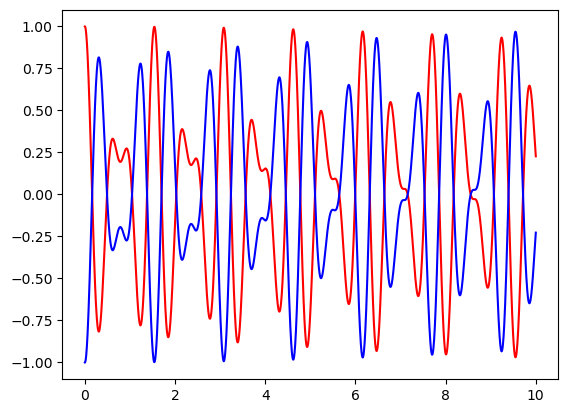

In [97]:
import matplotlib.pyplot as plt

# Código aquí ->
plt.plot(times,np.real(obs1),'r')
plt.plot(times,np.real(obs2),'b')
plt.show()
# Juegue con los valores de Jt y gt para obtener diferentes dinámicas! :o